# Overview

Crime is a terrible act that affects millions of lives on a daily basis. In an effort to gain some insight on one factor that affects crime rates we have decided to examine the correlation between crime and income across the United States. In an effort to examine crime in a more geographic setting we have generalized income to housing price index to more succinctly characterize a cities income. In this project we look at several cities across the United States, and the correlated housing price index, in the timespan of 1975-2010.

# Names

* Kajal Soni
* Karthik Manickam
* Isabel Rivera
* Steven Natalius
* David Katz-Mirkovich






# Research Question

This research will study the correlation between housing prices and crime rates within a few cities in the United States. We will try to see if there is any significant correlation between the housing price index of a various cities across the US and the crime rates in those cities to answer the question: do more expensive neighborhoods have lower crime rates than neighborhoods closer to poverty?

To do this we will be plotting the crime rates in these cities against the housing price index and seeing if we can see any trends in the data. To further the breadth of our research we will also look at other factors we have in our data to see if they may be contributing factors to the housing price index, like population.

# Background & Prior Work

The Bureau of Justice Statistics found that about 1 in 3 violent crimes occurred in or near the victim’s own home. Similarly, safety is an important factor considered when house shopping. Therefore, it is crucial to have a clear understanding of how the housing price index can affect the crime rate of that area. 
 
We often associate certain types of crimes with certain neighborhoods. However, is this association based on any proof, or just something we’ve created in our minds from television and social media? We are aware of the general factors that contribute to crime rate, such as social and economic factors such as the age of the population, poverty levels, and some political factors. Our question, then, examines the correlation between average housing price and crime rate within that area.We aim to not only answer where crime rates occur more or less frequently, but also how the type of crimes differ depending on the average housing price of that area.

There are various studies examining a crime rates affect on housing price index but despite the results from these studies, the answer has remained somewhat ambiguous. Our analyization, additionally, asks the less common question of how does housing price index correlate with crime rates of that particular area. The International Journal of Housing Markets and Analysis published a research paper, “Impact of crime on spatial analysis of house prices: evidence from a UK city”. This study found that in the city of Belfast, burglary and theft are associated with higher-income neighborhoods, whereas violence against persons, criminal damage and drugs offences are mainly associated with lower-priced neighborhoods.

# Hypothesis

As housing can be a person’s greatest and biggest material investment, our group believes  that the higher the value of the property, the more secure the area around it should be. As a result, we are expecting higher priced houses to have a lower crime index as we expect security and policing available in these areas. Finally, we expect that there will be a negative correlation between housing prices and the crime rate in an area, specifically cities.

# Dataset

**Dataset Name:** Housing Price Index using Crime Rate Data  
**Link to the dataset:** https://www.kaggle.com/sandeep04201988/housing-price-index-using-crime-rate-data  
**Number of Observations:** 3477

This data set is composed of 44 US cities and spans from 1975 to 2015. It is composed of the housing price index and number of crimes that occur in a specific city in a specific year, as well as other observations described later in this analysis. One of the primary values in the data set is the housing price index (HPI), and so an understanding is necessary for further analysis.

The housing price index is a broad measure of the rate of change of house prices. It serves as a timely, accurate indicator of house price trends at various geographic levels. It also provides housing economists with an analytical tool that is useful for estimating changes in the rates of mortgage defaults, prepayments and housing affordability in specific geographic areas. The HPI is a measure designed to capture changes in the value of single-family houses in the U.S. as a whole, in various regions and in smaller areas.

**Each data point includes the following observations:**
* The year the data point refers to
* The US city the data point refers to
* The housing price index of that city in that year
* The population of the city at that time
* The number of violent crimes that occurred in that city during that year
* The number of homicides that occurred in that city during that year
* The number of rapes that occurred in that city during that year
* The number of assaults that occurred in that city during that year
* The number of robberies that occurred in that city during that year

The sources of these observations come from two federal datasets. The data relating to the housing price index data comes from the Federal Housing Finance Agency (FHFA) “House Price Indexes (HPIs)” database. The data relating to crime observations (as well as population) is acquired from the FBI Uniform Crime Reporting program's "Offenses Known and Clearances by Arrest" database.

# Setup

In [17]:
# Imports used for the visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

### Initial steps towards cleaning the data:
1) Read csv file and create initial data frame  
2) Re-naming columns to simpler names for easier access in our code  
3) Drop all rows from data set that contained null values in any column, as we need all the information for any entry in the dataset to be relevant to our analysis  
4) Added 3 new columns as follows:
* **other** = all non-property crimes (the sum of all crimes barring robberies)
* **total** = sum of all crime types
* **ratio** = a ratio of the population of a given city to the total crime in that city

In [18]:
df = pd.read_csv('data.csv')
assert isinstance(df, pd.DataFrame)

df.columns = ["year", "index", "city", "population", "violent", "homicides", "rapes", "assaults", "robberies"]
df = df.dropna()

df['other'] = df[['violent', 'homicides', 'rapes', 'assaults']].sum(axis=1)
df['total'] = df[['violent', 'homicides', 'rapes', 'assaults', 'robberies']].sum(axis=1)
df['ratio'] = df['population'] / df['total']


# Check the data
df.head()

,year,index,city,population,violent,homicides,rapes,assaults,robberies,other,total,ratio
0,1975.0,41.080,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12179.0,16066.0,30.535541
1,1975.0,30.750,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0,52149.0,74320.0,42.384284
2,1975.0,36.350,"Cleveland, OH",659931.0,10403.0,288.0,491.0,2524.0,7100.0,13706.0,20806.0,31.718302
3,1975.0,20.910,"Oakland, CA",337748.0,5900.0,111.0,316.0,2288.0,3185.0,8615.0,11800.0,28.622712
4,1975.0,20.385,"Seattle, WA",503500.0,3971.0,52.0,324.0,1492.0,2103.0,5839.0,7942.0,63.397129


### Next Steps:
1) Create helper function to be applied on **city** column to create **state** column so we can look for state by state patterns
* i.e. turn "Atlanta, GA" into "GA"

2) Create helper function to be applied on **state** column to create **region** column so we can look for patterns in the different regions (northeast, midwest, south, west)
* i.e. turn "GA" into "south"

Note: The **regions** we chose to represent come from the Census Bureau-designated regions and divisions of the US as found on wikipedia: https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States


In [19]:
# Given city string (ex. Chicago, IL), return just the state: IL
def get_state(city_string):
    return city_string.split()[1]

# Given state string (ex. IL), return the region that stae is in: northeast, midwest, south, or west
def get_region(state):
    for group in regions:
        if state in regions[group]:
            return group

regions = {
    'northeast': {'ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NJ', 'PA', 'NY'},
    'midwest': {'ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'MI', 'IL', 'IN', 'OH'},
    'south': {'TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC', 'TN', 'KY', 'WV', 'VA', 'MD', 'DE', 'DC'},
    'west': {'WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM', 'AK', 'HI'},
}

# Apply helper functions
df['state'] = df['city'].apply(get_state)
df['region'] = df['state'].apply(get_region)

# Check the cleaned data
df.head()

,year,index,city,population,violent,homicides,rapes,assaults,robberies,other,total,ratio,state,region
0,1975.0,41.080,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12179.0,16066.0,30.535541,GA,south
1,1975.0,30.750,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0,52149.0,74320.0,42.384284,IL,midwest
2,1975.0,36.350,"Cleveland, OH",659931.0,10403.0,288.0,491.0,2524.0,7100.0,13706.0,20806.0,31.718302,OH,midwest
3,1975.0,20.910,"Oakland, CA",337748.0,5900.0,111.0,316.0,2288.0,3185.0,8615.0,11800.0,28.622712,CA,west
4,1975.0,20.385,"Seattle, WA",503500.0,3971.0,52.0,324.0,1492.0,2103.0,5839.0,7942.0,63.397129,WA,west


### Creating dataframes for states and for regions

We will create one more dataframes:
* df_regions, a data frame that contains the summed data by region

In [20]:
# Create dataframe with data by region
df_regions = df.groupby(df.region).sum()
df_regions = df_regions[['population', 'violent', 'homicides', 'rapes', 'assaults', 'robberies', 'other', 'total']]

# Check dataframe
df_regions.head()

,population,violent,homicides,rapes,assaults,robberies,other,total
region,,,,,,,,
midwest,309400182.0,4400390.0,68987.0,252313.0,2048890.0,2030200.0,6770580.0,8800780.0
northeast,125226243.0,1677459.0,24804.0,78032.0,716392.0,858231.0,2496687.0,3354918.0
south,383676057.0,5155870.0,77730.0,241787.0,2667771.0,2168582.0,8143158.0,10311740.0
west,244348629.0,2078851.0,24953.0,131091.0,1149139.0,773668.0,3384034.0,4157702.0


# Data Analysis & Results

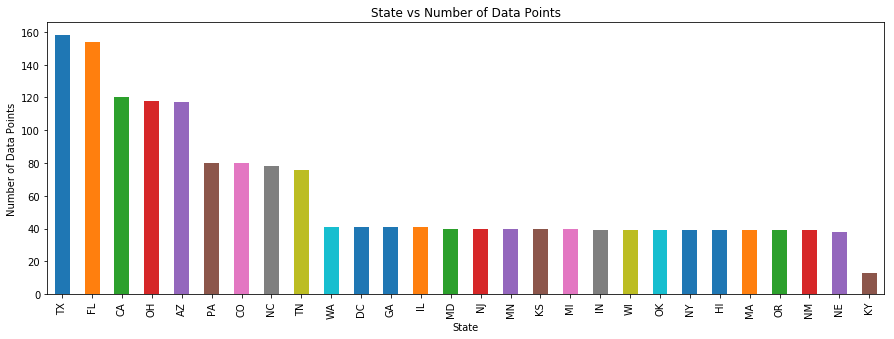

In [21]:
v1 = df['state'].value_counts().plot.bar(figsize=(15,5), title='State vs Number of Data Points')

v1.set_xlabel("State")
v1.set_ylabel("Number of Data Points")

f1 = plt.gcf()

Before trying to analyze the housing price index and crime rate data, we wanted to get a sense of the scope of our dataset. We looked at the distribution of rows of data we had in our dataset by state to see whether we had an even distribution of data across the US. We found two important things from this visualization:
* We only have data from 28 out of the 50 states
* The states for which we do have data are not evenly represented in the data 

We keep these facts in mind as they could potentially lead to bias in any results that we may find

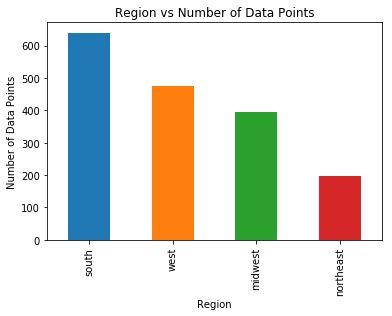

In [22]:
v2 = df['region'].value_counts().plot.bar(title='Region vs Number of Data Points')

v2.set_xlabel("Region")
v2.set_ylabel("Number of Data Points")

f2 = plt.gcf()

We noted that similarly to our state by state data, we found that the four regions of the US were also not equally represented in our dataset. This is important as our analysis may be skewed towards favoring the entries in our dataset that come from states in the south, as they are significantly more in number than the entries in our data that come from the northeast.

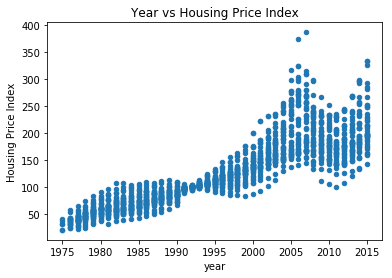

In [23]:
v3 = df.plot.scatter(x='year', y='index', title="Year vs Housing Price Index")

v3.set_ylabel('Housing Price Index')

f3 = plt.gcf()

This graph shows how the Housing Index has changed between 1975 and 2015. There is a general increase of the index over the years, which is expected. The dip in the housing price index in 2005, followed by the increase around 2010 captures the US housing bubble that occurred during that time. 

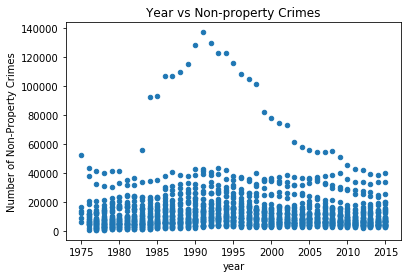

In [24]:
v4 = df.plot.scatter(x='year', y='other', title="Year vs Non-property Crimes")

v4.set_ylabel('Number of Non-Property Crimes')

f3 = plt.gcf()

This graph shows how the crime rate of non robbery related crimes has changed over time. One can observe a general increase and then decrease in the crime rate. An article by the Atlantic City suggests that this increase was because of a crack-cocaine epidemic in the mid-1980s and Lyndon B. Johnson presidency. The later decrease in crime rate could have been because of the economic growth, lower unemployment rates, and a better prison system. The general decrease in crime rate overlapped with the general increase in housing index suggests that there could be some correlation between the two.

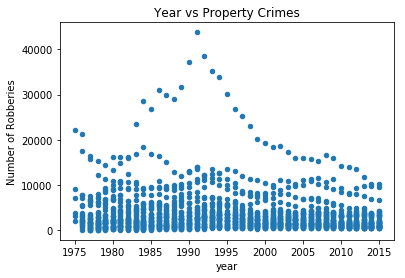

In [25]:
v5 = df.plot.scatter(x='year', y='robberies', title='Year vs Property Crimes')

v5.set_ylabel('Number of Robberies')

f3 = plt.gcf()

This graph shows how the crime rate of specifically robberies  has changed over time. This graph follows a similar pattern as the one for non robbery related crimes, and also shows the increase with a peak between 1990 and 1995, followed by a decrease. The reasons for this remain the same. One can also lead to the same conclusion that the decrease in robberies combined with an increase in housing index could suggest a correlation. 

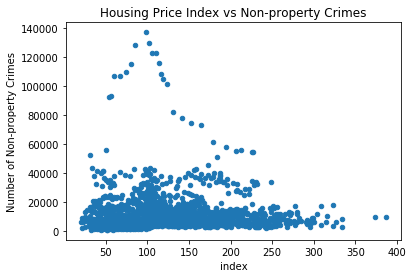

In [26]:
v6 = df.plot.scatter(x='index', y='other', title='Housing Price Index vs Non-property Crimes')

v6.set_ylabel('Number of Non-property Crimes')

f3 = plt.gcf()

This graph examines the correlation between housing index and other crimes. Other crimes are characterized as all crimes besides violent crimes, homicides, rapes, assaults and robberies. We anticipate a positive linear correlation where as index increases as does the number of other crimes increases. It can be seen in the graph that this shape is not present and, instead, the graph appears to have no correlation. The outliers appear to have a distinct peak, that still cannot show correlation, however

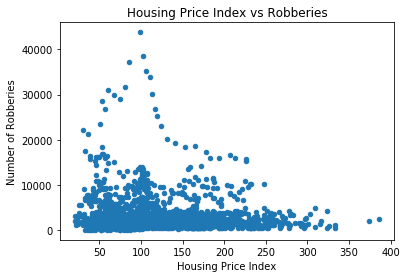

In [27]:
v7 = df.plot.scatter(x='index', y='robberies', title='Housing Price Index vs Robberies')

v7.set_xlabel('Housing Price Index')
v7.set_ylabel('Number of Robberies')

f3 = plt.gcf()

This graph examines the correlation between housing index and robberies. We anticipate a positive correlation between the two categories. The graph shows no correlation, however, showing only a dense horizontal behavior across lower indexes and lower robberies. Outliers here also display a peak that cannot be determined as a correlation. 

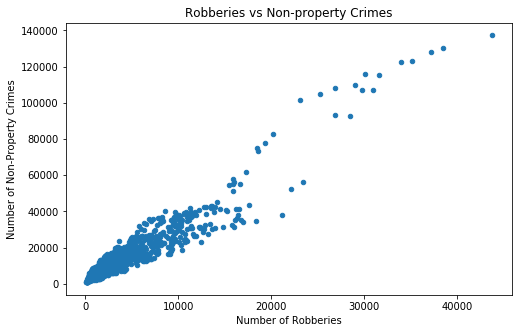

In [28]:
v8 = df.plot.scatter(x='robberies', y='other', figsize=(8, 5), title='Robberies vs Non-property Crimes')

v8.set_xlabel('Number of Robberies')
v8.set_ylabel('Number of Non-Property Crimes')

f3 = plt.gcf()

The one correlation that we found (as expected) to be linear was the ratio of robberies to 'other' types of crime (all non property crimes in our dataset). The general indication of this graph is that areas with high numbers of robberies also had a large number of other types of crime. This could potentially mean that the number of robberies is an indicator of other types of crimes in an area.

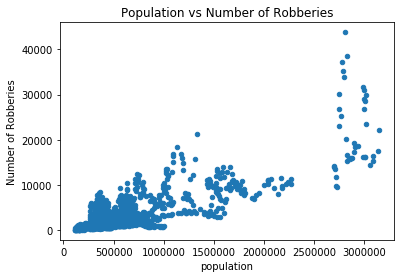

In [29]:
v9 = df.plot.scatter(x='population', y='robberies', title="Population vs Number of Robberies")

v9.set_ylabel('Number of Robberies')

f3 = plt.gcf()

This graph will explore the correlation between population and number of robberies involved in all of the examined area. We expect that as the population increases, the number of robberies will too. This is due to the fact that assuming the percentage of robberies is the same, the number of robberies will increase as the population increases. This behaviour can be seen in the given graph, where the x-axis represents the number of population and the y-axis represents the number of robberies. As we can examine, the graph follows a linear trend.

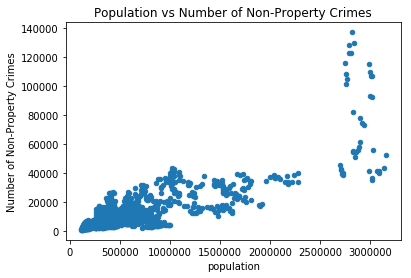

In [30]:
v10 = df.plot.scatter(x='population', y='other', title="Population vs Number of Non-Property Crimes")

v10.set_ylabel('Number of Non-Property Crimes')

f3 = plt.gcf()

This graph will explore the correlation between population and the number of other types of crimes besides robberies in all of the examined area. As we can examine on the graph, the number of crimes increases following the population. This behavior is expected as the ratio between the crimes and population will stay the same, thus explaining the linear trend line on the graph.

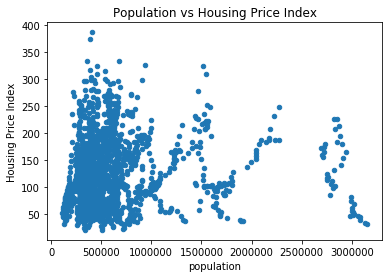

In [31]:
v11 = df.plot.scatter(x='population', y='index', title="Population vs Housing Price Index")

v11.set_ylabel('Housing Price Index')

f3 = plt.gcf()

This graph will explore the correlation between population and the house pricing index in the examined area. As we can see the pricing index is higher on a specific area instead of following our hypothesis where the higher the population is, the higher the index are. Thus, there’s no direct correlation on the pricing index to the population.

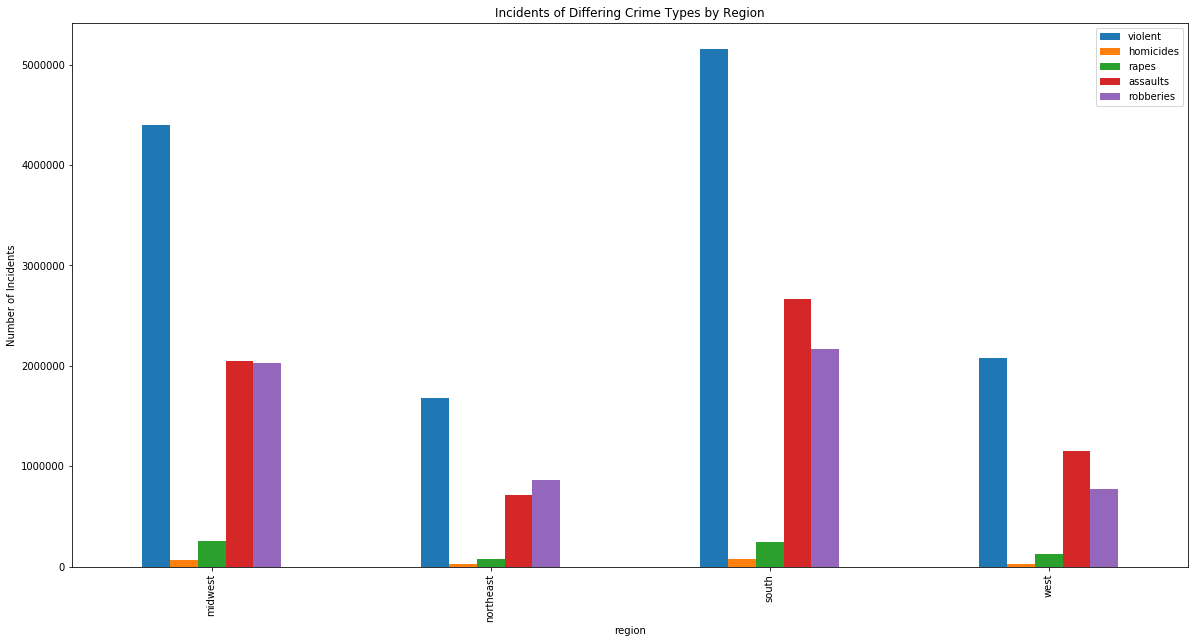

In [32]:
v12 = df_regions[['violent', 'homicides', 'rapes', 'assaults', 'robberies']].plot.bar(figsize=(20, 10), title="Incidents of Differing Crime Types by Region")

v12.set_ylabel('Number of Incidents')

f3 = plt.gcf()

This graph explores if there is any correlation between regions of the US, and the types of crime that are committed in that region.The percentage distribution of each crime is pretty much the same throughout all regions. Assaults are approximately as common as robberies, violent crimes are typically twice this amount, Homicides are the least common crime, and rapes are around twice that. The amount of crimes is different throughout the regions in the order of most crimes to least is South, Midwest, West, Northeast but this is not so conclusive due to the dataset possibly having more samples from cities in a certain region.

# Privacy / Ethics Considerations

The dataset we are working with and analyzing is made publicly available on Kaggle. It is important that this particular information does not expose the identity of any individual, being homeowner or criminal offender, as it is sensitive information that could be used to exploit either individual. However, because the dataset does not contain any identifying information, we do not utilize the Safe Harbor Method and do not have to drop any columns. The data, therefore, protects the privacy of homeowners and criminal offenders from which it is based upon. 
	
As with most data, especially data that contains aspects related to socio-economic factors, the data can contain and/or expose biases. Data could be manipulated and used in multiple ways to either benefit or disadvantage certain groups of people. Considering that our data analyzes correlations between house pricing and crime, this information could potentially be used to disadvantage homeowners in lower priced housing indices by maintaining these homes in low income areas or by devaluing the price of the homes in a particular area. Similarly, this information could be used to benefit groups of individuals searching to make a profit out areas with lower priced houses by comparing crime rates between these areas and areas with lower crime rates. Our report, then, aimed to analyze this data as objectively as possible. 

# Conclusion & Discussion

Our current findings show no significant correlation between crimes and housing price index. This may be due in part to the fact that there are many other random variables that fluctuate the housing price which we have not accounted for. Some popular locations (like Beverly Hills, Silicon Valley) can have an extremely high housing price while the crime rates are still pretty similar to most other cities in California. This pattern can be found on many major U.S cities, and that makes it hard to determine if crimes are actually a major contributing factor to the housing price index.

In doing our research we were, however, able to discover some other patterns in our data such as the positive correlation between crime rate and population, for instance. In the future, it could be useful to look into other such factors and their contributions to the housing price index. Housing is a huge and important investment and so it could be a useful study to understand what various factors could be associated with the housing price index, such as population of the city, proximity to police stations, the average income of the neighborhood, etc. 

Though we've concluded that crime rate alone isn't a good predictor of crime rates in a city, it may be an important factor to consider in a deeper analysis that includes various other factors mentioned above. Our study was limited by the fact that we only looked at crime rates as a contributing factor to housing price index, whereas we could have potentially searched for patterns with other variables as predictors.

In relating our research to other similar studies between crime rate and housing price index, we've come to a similar conclusion to these other studies: crime rate and housing price index are not necessarily correlated with each other because there are many other factors that can affect these two quantitative measures so one of them alone cannot be used as an effective predictor of the other.